## Naive Bayes classifiers

In [7]:
from sklearn.datasets import make_classification, make_blobs
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

In [2]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()


 ## Datasets

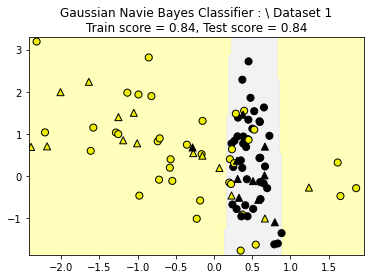

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                    random_state = 0)
nbclf = GaussianNB().fit(X_train,y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train , X_test, y_test,
                                  'Gaussian Navie Bayes Classifier : \ Dataset 1')



 ## Application to real-world example

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                    random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))



Breast cancer dataset
Accuracy of NN classifier on training set: 0.95
Accuracy of NN classifier on test set: 0.94


 ### Pros and Cons
 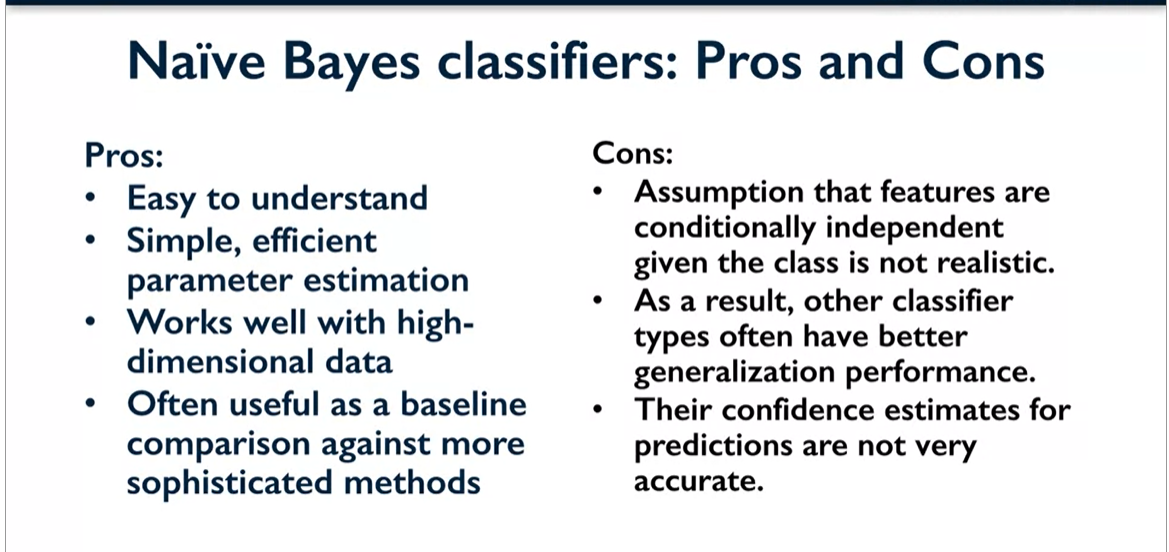

In [5]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

 ### Gradient Boosted Decision Trees

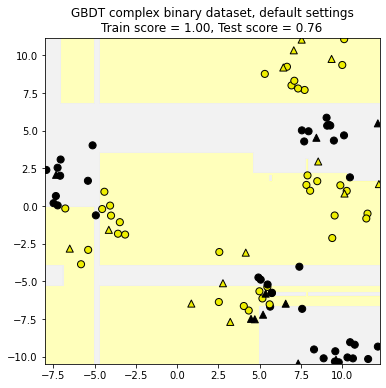

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(6,6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                          X_test, y_test, title, subaxes)
plt.show()

 ## Gradient boosted on real word dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                    random_state = 0)
clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast Cancer Dataset (learning rate = 0.1, max_depth = 3)')
print('Accuracy of GBDT classifier on trining set : {:.2f}'.
      format(clf.score(X_train,y_train)))
print('Accuracy of GBDT classifier on test set : {:.2f}'.
      format(clf.score(X_test,y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2,
                                 random_state = 0)
clf.fit(X_train, y_train) 

print('Breast Cancer Dataset (learning rate = 0.01, max_depth = 2)')
print('Accuracy of GBDT classifier on trining set : {:.2f}'.
      format(clf.score(X_train,y_train)))
print('Accuracy of GBDT classifier on test set : {:.2f}'.
      format(clf.score(X_test,y_test)))

Breast Cancer Dataset (learning rate = 0.1, max_depth = 3)
Accuracy of GBDT classifier on trining set : 1.00
Accuracy of GBDT classifier on test set : 0.97
Breast Cancer Dataset (learning rate = 0.01, max_depth = 2)
Accuracy of GBDT classifier on trining set : 0.97
Accuracy of GBDT classifier on test set : 0.97


 ## Neural Networks 

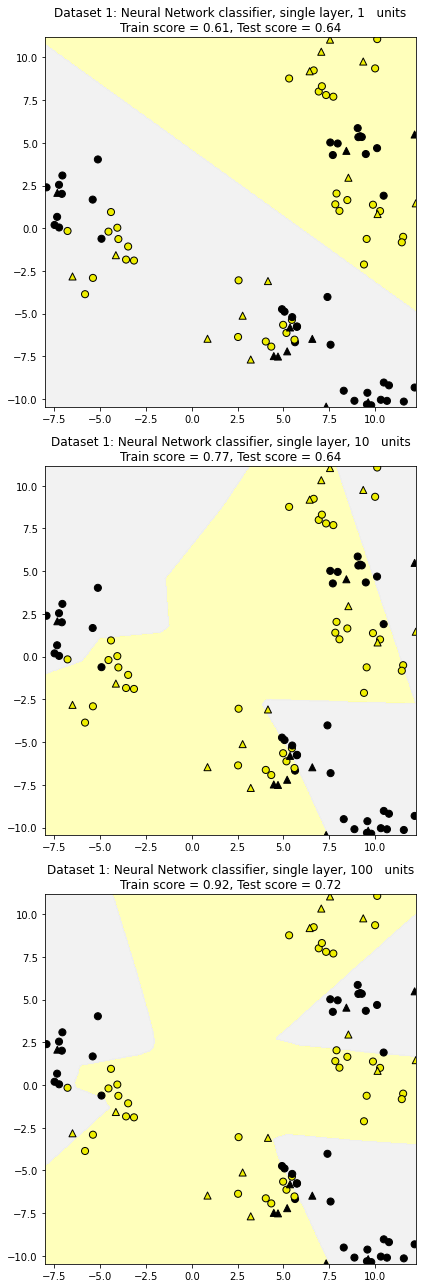

In [17]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state = 0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units,axis in zip([1, 10, 100], subaxes):
  nnclf = MLPClassifier(hidden_layer_sizes=[units], solver = 'lbfgs',
                        random_state = 0).fit(X_train, y_train)
  title ='Dataset 1: Neural Network classifier, single layer, {} \
  units'.format(units)
  plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                            X_test, y_test, title, axis)
  plt.tight_layout()

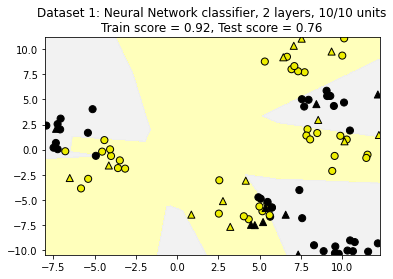

In [19]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state = 0)

nnclf = MLPClassifier(hidden_layer_sizes=[10,10], solver = 'lbfgs',
                        random_state = 0).fit(X_train, y_train)
title ='Dataset 1: Neural Network classifier, 2 layers, 10/10 units'
plot_class_regions_for_classifier(nnclf, X_train, y_train,
                                            X_test, y_test, title)

 ### Regularisation parameter: alpha

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

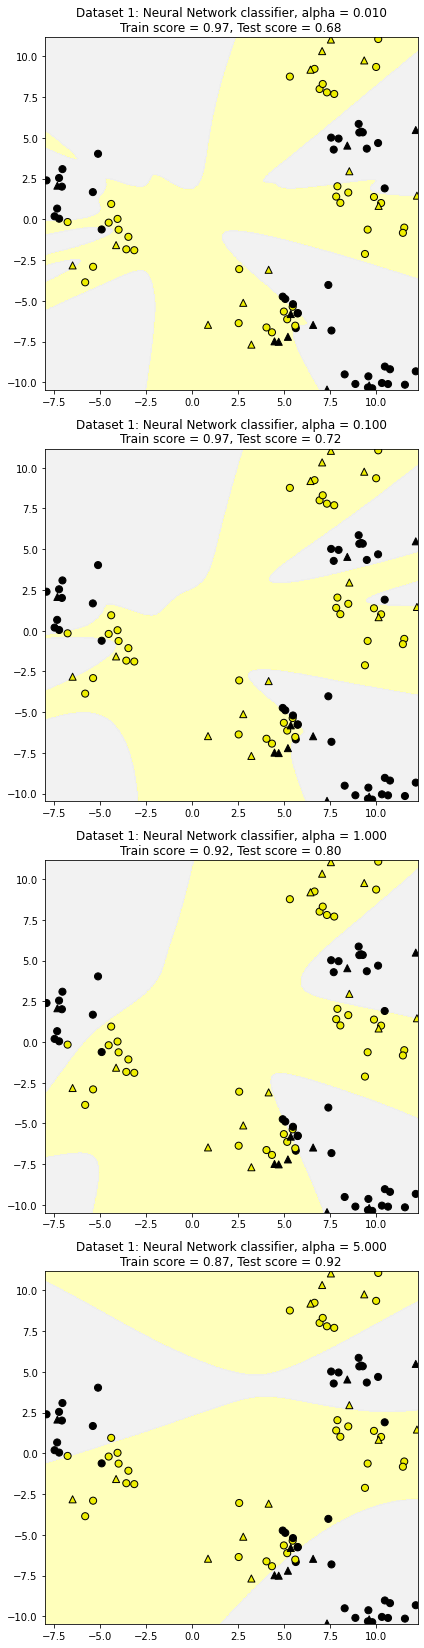

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state = 0)

fig, subaxes = plt.subplots(4, 1, figsize=(6,23))

for this_alpha,axis in zip([0.01, 0.10, 1 ,5], subaxes):
  nnclf = MLPClassifier(solver = 'lbfgs', activation = 'tanh',
                        alpha = this_alpha,
                        hidden_layer_sizes = [100, 100], 
                        random_state = 0).fit(X_train, y_train)
  title ='Dataset 1: Neural Network classifier, alpha = {:.3f}'.format(this_alpha)
  plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                            X_test, y_test, title, axis)
  plt.tight_layout()

 ### Application to real-world dataset

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                    random_state = 0)
nnclf = MLPClassifier(solver = 'lbfgs',
                        alpha = 5,
                        hidden_layer_sizes = [100, 100], 
                        random_state = 0).fit(X_train, y_train)

print('Breast Cancer Dataset')
print('Accuracy of NN classifier on trining set : {:.2f}'.
      format(nnclf.score(X_train,y_train)))
print('Accuracy of NN classifier on test set : {:.2f}'.
      format(nnclf.score(X_test,y_test)))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
nnclf = MLPClassifier(solver = 'lbfgs',
                        alpha = 5,
                        hidden_layer_sizes = [100, 100], 
                        random_state = 0).fit(X_train_scaled, y_train)

print('\nBreast Cancer Dataset (After Scalling)')
print('Accuracy of NN classifier on trining set : {:.2f}'.
      format(nnclf.score(X_train_scaled,y_train)))
print('Accuracy of NN classifier on test set : {:.2f}'.
      format(nnclf.score(X_test_scaled,y_test)))

Breast Cancer Dataset
Accuracy of NN classifier on trining set : 0.39
Accuracy of NN classifier on test set : 0.39

Breast Cancer Dataset (After Scalling)
Accuracy of NN classifier on trining set : 0.98
Accuracy of NN classifier on test set : 0.90
